# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
#print("Beginning Data Retrieval     ")
#print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = url + "appid=" + weather_api_key + "&q=" + city
    city_url = f"{url}appid={weather_api_key}&units={units}&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #city_weat_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lon = city_weather['coord']['lon']
        city_lat = city_weather['coord']['lat']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lon, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #If an error is experienced, skip the city
    except:
        #PrintError()
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 6 of Set 1 | hirara
Processing Record 7 of Set 1 | sisimiut
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | yerofey pavlovich
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | dalandzadgad
Processing Record 13 of Set 1 | souillac
Processing Record 14 of Set 1 | gornopravdinsk
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | margaret river
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | morehead city
Processing Record 19 of Set 1 | invercargill
Processing Record 20 of Set 1 | bel ombre
Processing Record 21 of Set 1 | blackmans bay
Processing Record 22 of Set 1 | longyear

Processing Record 39 of Set 4 | buka
Processing Record 40 of Set 4 | badger
Processing Record 41 of Set 4 | nuuk
Processing Record 42 of Set 4 | 'ohonua
City not found. Skipping...
Processing Record 43 of Set 4 | shingu
Processing Record 44 of Set 4 | uturoa
Processing Record 45 of Set 4 | island harbour
Processing Record 46 of Set 4 | akureyri
Processing Record 47 of Set 4 | wildwood
Processing Record 48 of Set 4 | marudi
City not found. Skipping...
Processing Record 49 of Set 4 | nadym
Processing Record 0 of Set 5 | jiangyou
Processing Record 1 of Set 5 | utrik
Processing Record 2 of Set 5 | richards bay
Processing Record 3 of Set 5 | gannan
Processing Record 4 of Set 5 | vorgashor
Processing Record 5 of Set 5 | kijang
Processing Record 6 of Set 5 | sola
Processing Record 7 of Set 5 | likhoslavl'
Processing Record 8 of Set 5 | kapuskasing
Processing Record 9 of Set 5 | barentu
Processing Record 10 of Set 5 | rio grande
Processing Record 11 of Set 5 | al kharijah
Processing Record 12 

Processing Record 29 of Set 8 | sibiti
Processing Record 30 of Set 8 | lospalos
Processing Record 31 of Set 8 | carbonear
Processing Record 32 of Set 8 | kruisfontein
Processing Record 33 of Set 8 | howard springs
Processing Record 34 of Set 8 | yuzhno-kurilsk
Processing Record 35 of Set 8 | ji'an
Processing Record 36 of Set 8 | aasiaat
Processing Record 37 of Set 8 | al muwayh
Processing Record 38 of Set 8 | puerto gaitan
Processing Record 39 of Set 8 | gereshk
Processing Record 40 of Set 8 | fonadhoo
City not found. Skipping...
Processing Record 41 of Set 8 | mahibadhoo
Processing Record 42 of Set 8 | dwarka
Processing Record 43 of Set 8 | suai
City not found. Skipping...
Processing Record 44 of Set 8 | katsuura
Processing Record 45 of Set 8 | kaiapoi
Processing Record 46 of Set 8 | nizhnesortymskiy
Processing Record 47 of Set 8 | tarrafal de sao nicolau
Processing Record 48 of Set 8 | banda aceh
Processing Record 49 of Set 8 | san martin
Processing Record 0 of Set 9 | qamdo
Processi

Processing Record 18 of Set 12 | dubna
Processing Record 19 of Set 12 | beau vallon
Processing Record 20 of Set 12 | awjilah
Processing Record 21 of Set 12 | maceio
Processing Record 22 of Set 12 | gao
Processing Record 23 of Set 12 | hovd
Processing Record 24 of Set 12 | morshansk
Processing Record 25 of Set 12 | tvoroyri
Processing Record 26 of Set 12 | salem
Processing Record 27 of Set 12 | panama city beach
Processing Record 28 of Set 12 | queenstown
Processing Record 29 of Set 12 | mancio lima
Processing Record 30 of Set 12 | gebeit
Processing Record 31 of Set 12 | mandalgovi
Processing Record 32 of Set 12 | tidjikja
Processing Record 33 of Set 12 | sterling
Processing Record 34 of Set 12 | tabou
Processing Record 35 of Set 12 | abadan
Processing Record 36 of Set 12 | labuan
Processing Record 37 of Set 12 | cidreira
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [6]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,2.31,72,8,4.62,TF,1691569726
1,thompson,55.7435,-97.8558,8.09,81,75,2.06,CA,1691569796
2,waitangi,-43.9535,-176.5597,9.34,84,90,4.02,NZ,1691569796
3,hirara,24.8000,125.2833,29.15,84,75,4.63,JP,1691569796
4,sisimiut,66.9395,-53.6735,5.96,75,86,0.48,GL,1691569791
5,jamestown,42.0970,-79.2353,18.73,100,100,3.60,US,1691569784
6,grytviken,-54.2811,-36.5092,-1.36,89,68,4.07,GS,1691569796
7,yerofey pavlovich,53.9667,121.9667,24.59,40,90,3.98,RU,1691569797
8,ushuaia,-54.8000,-68.3000,0.81,86,0,1.03,AR,1691569797
9,dalandzadgad,43.5708,104.4250,32.04,21,94,8.11,MN,1691569797


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.31,72,8,4.62,TF,1691569726
1,thompson,55.7435,-97.8558,8.09,81,75,2.06,CA,1691569796
2,waitangi,-43.9535,-176.5597,9.34,84,90,4.02,NZ,1691569796
3,hirara,24.8000,125.2833,29.15,84,75,4.63,JP,1691569796
4,sisimiut,66.9395,-53.6735,5.96,75,86,0.48,GL,1691569791


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

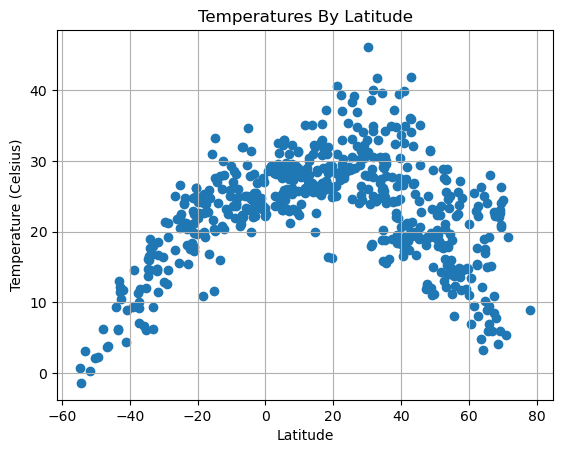

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperatures By Latitude")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

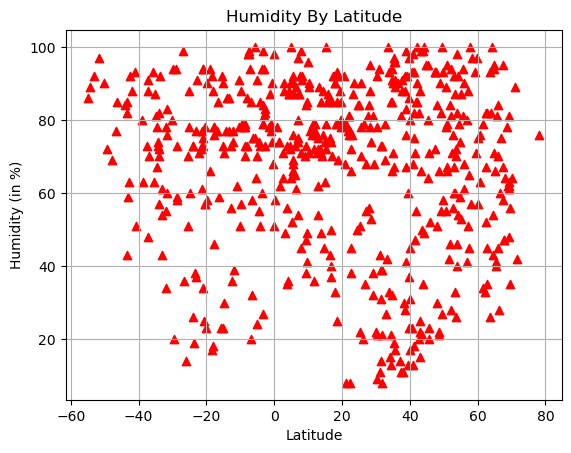

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="^", color = "red")

# Incorporate the other graph properties
plt.title("Humidity By Latitude")
plt.ylabel("Humidity (in %)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

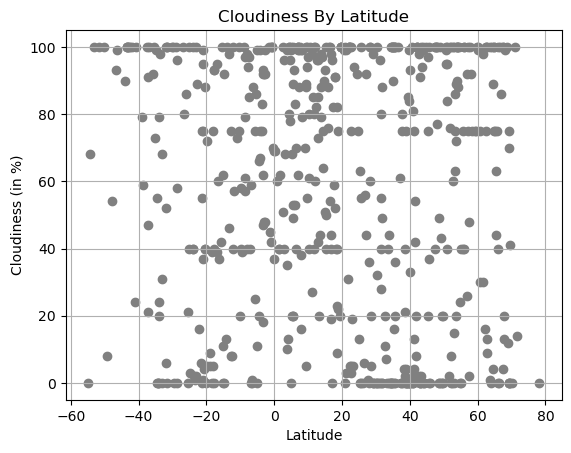

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", color = "gray")

# Incorporate the other graph properties
plt.title("Cloudiness By Latitude")
plt.ylabel("Cloudiness (in %)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

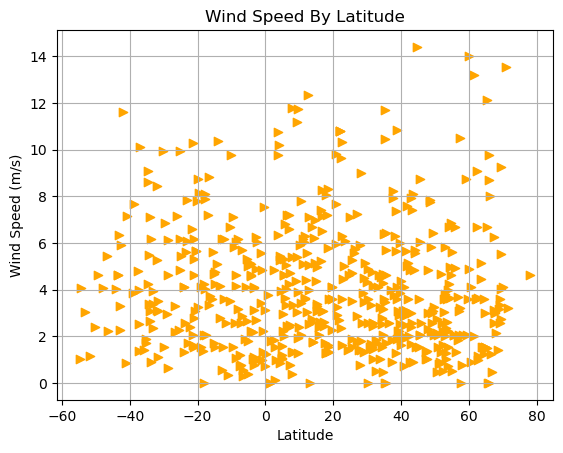

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker=">", color = "orange")

# Incorporate the other graph properties
plt.title("Wind Speed By Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,thompson,55.7435,-97.8558,8.09,81,75,2.06,CA,1691569796
3,hirara,24.8000,125.2833,29.15,84,75,4.63,JP,1691569796
4,sisimiut,66.9395,-53.6735,5.96,75,86,0.48,GL,1691569791
5,jamestown,42.0970,-79.2353,18.73,100,100,3.60,US,1691569784
7,yerofey pavlovich,53.9667,121.9667,24.59,40,90,3.98,RU,1691569797


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.31,72,8,4.62,TF,1691569726
2,waitangi,-43.9535,-176.5597,9.34,84,90,4.02,NZ,1691569796
6,grytviken,-54.2811,-36.5092,-1.36,89,68,4.07,GS,1691569796
8,ushuaia,-54.8000,-68.3000,0.81,86,0,1.03,AR,1691569797
10,souillac,-20.5167,57.5167,26.21,57,40,5.66,MU,1691569797


###  Temperature vs. Latitude Linear Regression Plot

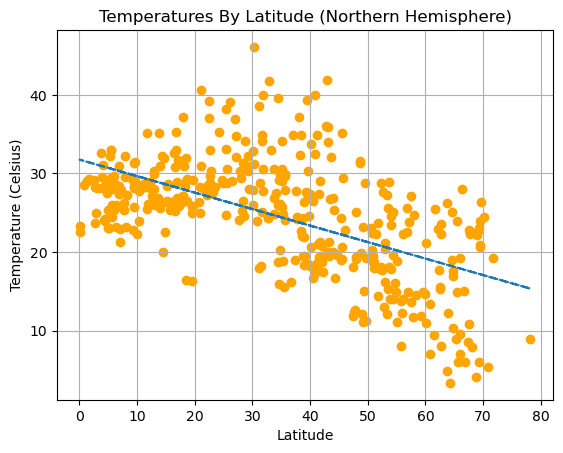

In [16]:
# Linear regression on Northern Hemisphere
latitude = northern_hemi_df["Lat"]
temperature = northern_hemi_df["Max Temp"] 

nh_slope, nh_int, nh_r, nh_p, nh_std_err = stats.linregress(latitude, temperature)

nh_fit = nh_slope * latitude + nh_int

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o", color="orange")
plt.plot(latitude, nh_fit, "--")
# Incorporate the other graph properties
plt.title("Temperatures By Latitude (Northern Hemisphere)")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()

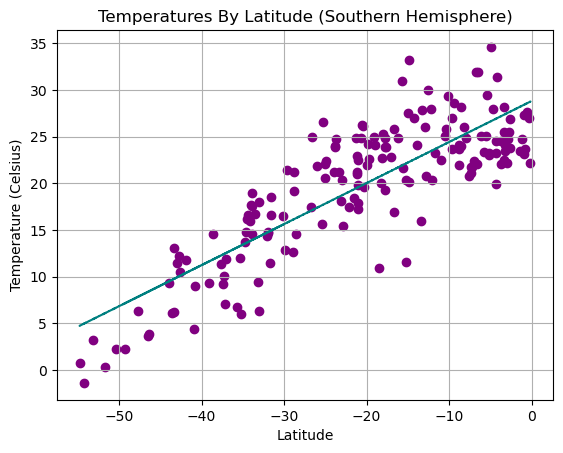

In [17]:
# Linear regression on Southern Hemisphere
latitude = southern_hemi_df["Lat"]
temperature = southern_hemi_df["Max Temp"] 

sh_slope, sh_int, sh_r, sh_p, sh_std_err = stats.linregress(latitude, temperature)

sh_fit = sh_slope * latitude + sh_int

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o", color="purple")
plt.plot(latitude, sh_fit, "--", color="teal")
# Incorporate the other graph properties
plt.title("Temperatures By Latitude (Southern Hemisphere)")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig6.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Oddly enough, as you get further away from the equator, the colder it gets.

### Humidity vs. Latitude Linear Regression Plot

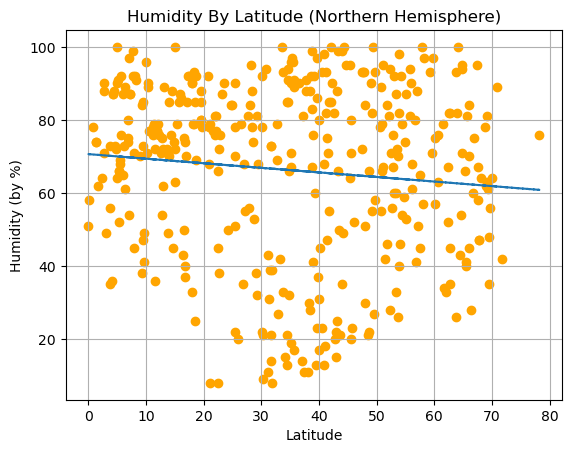

In [18]:
# Northern Hemisphere
latitude = northern_hemi_df["Lat"]
humidity = northern_hemi_df["Humidity"] 

nh_slope, nh_int, nh_r, nh_p, nh_std_err = stats.linregress(latitude, humidity)

nh_fit = nh_slope * latitude + nh_int

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o", color="orange")
plt.plot(latitude, nh_fit, "--")
# Incorporate the other graph properties
plt.title("Humidity By Latitude (Northern Hemisphere)")
plt.ylabel("Humidity (by %)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig7.png")

# Show plot
plt.show()

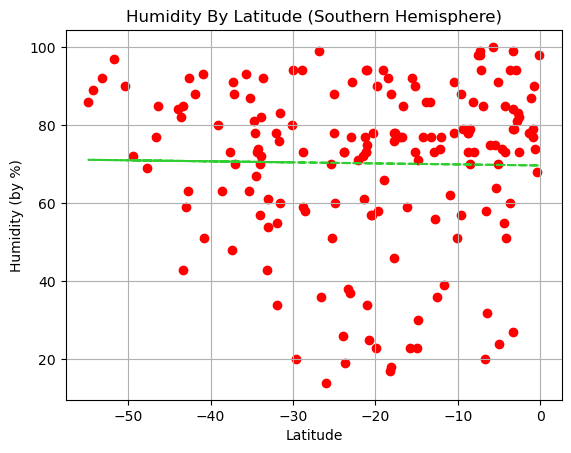

In [19]:
# Southern Hemisphere
latitude = southern_hemi_df["Lat"]
humidity = southern_hemi_df["Humidity"] 

sh_slope, sh_int, sh_r, sh_p, sh_std_err = stats.linregress(latitude, humidity)

sh_fit = sh_slope * latitude + sh_int

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o", color="red")
plt.plot(latitude, sh_fit, "--", color="limegreen")
# Incorporate the other graph properties
plt.title("Humidity By Latitude (Southern Hemisphere)")
plt.ylabel("Humidity (by %)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig8.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Never realized how moist the planet is. Most locations are above 60% humidity. There seems to be a bigger difference in the Northern Hemisphere, with a decrease as you move away from the equator.

### Cloudiness vs. Latitude Linear Regression Plot

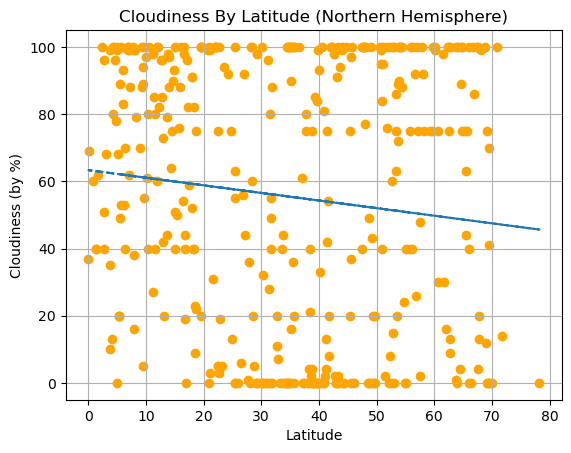

In [20]:
# Northern Hemisphere
latitude = northern_hemi_df["Lat"]
cloudiness = northern_hemi_df["Cloudiness"] 

nh_slope, nh_int, nh_r, nh_p, nh_std_err = stats.linregress(latitude, cloudiness)

nh_fit = nh_slope * latitude + nh_int

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o", color="orange")
plt.plot(latitude, nh_fit, "--")
# Incorporate the other graph properties
plt.title("Cloudiness By Latitude (Northern Hemisphere)")
plt.ylabel("Cloudiness (by %)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig9.png")

# Show plot
plt.show()

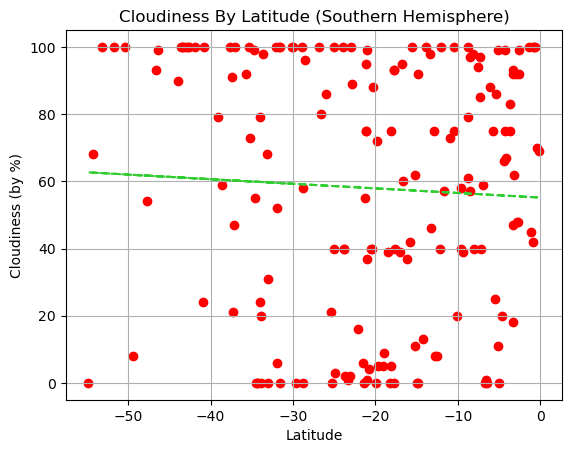

In [21]:
# Southern Hemisphere
latitude = southern_hemi_df["Lat"]
cloudiness = southern_hemi_df["Cloudiness"] 

sh_slope, sh_int, sh_r, sh_p, sh_std_err = stats.linregress(latitude, cloudiness)

sh_fit = sh_slope * latitude + sh_int

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o", color="red")
plt.plot(latitude, sh_fit, "--", color="limegreen")
# Incorporate the other graph properties
plt.title("Cloudiness By Latitude (Southern Hemisphere)")
plt.ylabel("Cloudiness (by %)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig10.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** The Cloudiness of the planet seems to be all or nothing. This is probably due to the API pull taking a snapshot in time. If we had taken an average over say, 6 months this chart would be very different. While there is a decline as you move away from the equator in the Northern Hemisphere, in the Southern Hemisphere it's reversed, as the decline is towards the equator.

### Wind Speed vs. Latitude Linear Regression Plot

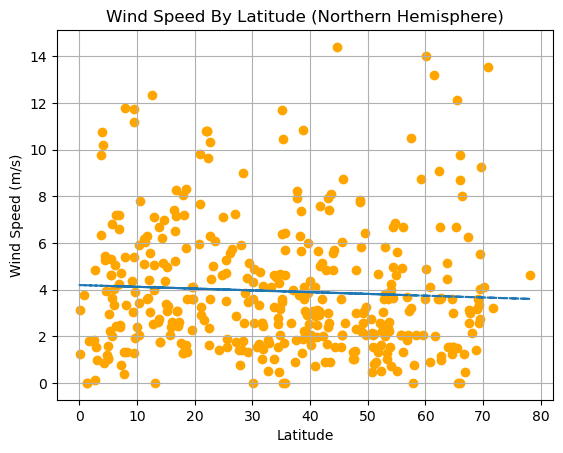

In [22]:
# Northern Hemisphere
latitude = northern_hemi_df["Lat"]
wind_speed = northern_hemi_df["Wind Speed"] 

nh_slope, nh_int, nh_r, nh_p, nh_std_err = stats.linregress(latitude, wind_speed)

nh_fit = nh_slope * latitude + nh_int

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o", color="orange")
plt.plot(latitude, nh_fit, "--")
# Incorporate the other graph properties
plt.title("Wind Speed By Latitude (Northern Hemisphere)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig11.png")

# Show plot
plt.show()

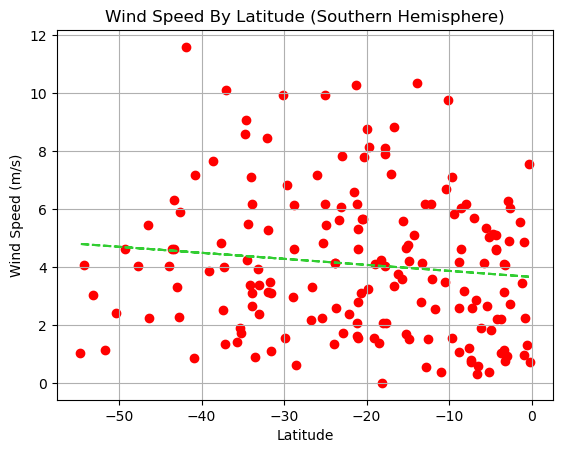

In [23]:
# Southern Hemisphere
latitude = southern_hemi_df["Lat"]
wind_speed = southern_hemi_df["Wind Speed"] 

sh_slope, sh_int, sh_r, sh_p, sh_std_err = stats.linregress(latitude, wind_speed)

sh_fit = sh_slope * latitude + sh_int

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o", color="red")
plt.plot(latitude, sh_fit, "--", color="limegreen")
# Incorporate the other graph properties
plt.title("Wind Speed By Latitude (Southern Hemisphere)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig12.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** The wind speed tells the same story as the cloudiness. In the Northern Hemisphere the speed declines as you head away from the equator and the opposite showing in the Southern Hemisphere